<a href="https://colab.research.google.com/github/aakhterov/ML_algorithms_from_scratch/blob/master/logistic_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Basic Implementation of Logistic Regression
"""

'\nBasic Implementation of Logistic Regression\n'

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
class MyLogisticRegression:

    def __init__(self):
        self.W = None
        self.b = None

    def __initialization(self, m_features):
        self.W = np.random.rand(m_features, 1)
        self.b = np.random.rand(1, 1)

    def __sigmoid(self, Z):
        return 1/(1 + np.exp(-Z))

    def __dsigmoid(self, Z):
        return self.__sigmoid(Z)*(1-self.__sigmoid(Z))

    def __forward(self, X):
        Z = np.dot(X, self.W) + self.b
        y_hat = self.__sigmoid(Z)
        return y_hat, Z

    def __cost_function(self, y_hat, y):
        m = y.shape[0]
        return -np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))/m

    def __dcost_function(self, y_hat, y):
        m = y.shape[0]
        return -(y/y_hat - (1-y)/(1-y_hat))/m

    def fit(self, X, y, learning_rate=0.01, iterations=1000, show_cost_every_iter=100):
        """
        Input
            X - (n_samples, n_features) Training data, where n_samples is the number of samples and n_features
            is the number of features.
            y - (n_samples,) - true label of samples
        """
        m_features = X.shape[1]
        n = X.shape[0]
        self.__initialization(m_features)
        for i in range(1, iterations+1):
            y_hat, Z = self.__forward(X)
#             print(Z)
            if i%show_cost_every_iter==0:
                print (f"Iteration {i}. Cost function={self.__cost_function(y_hat, y.reshape(n,-1))}")
            dy_hat = self.__dcost_function(y_hat, y.reshape(n,-1))
#             print(f"dy_hat.shape={dy_hat.shape}")
            dsigmoid = self.__dsigmoid(Z)
#             print(f"dsigmoid.shape={dsigmoid.shape}")
#             print(f"X.T.shape={X.T.shape}")
            dW = np.dot(X.T, dy_hat * dsigmoid)
#             print(dW.shape)
            db = np.sum(self.__dcost_function(y_hat, y.reshape(n,-1)) * self.__dsigmoid(Z))
            self.W -= learning_rate*dW
            self.b -= learning_rate*db

    def predict(self, X, thr=0.5):
        y_hat, _ = self.__forward(X)
        return (y_hat>=thr).astype(int), y_hat

### Testing on sintetic data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
num_point_in_class = 50
X0 = 1.2*np.random.randn(num_point_in_class, 1) + 2.5
X1 = 1.2*np.random.randn(num_point_in_class, 1) + 7.5
X = np.vstack((X0, X1))
y = np.hstack(([0 for _ in range(num_point_in_class)], [1 for _ in range(num_point_in_class)]))

<AxesSubplot:>

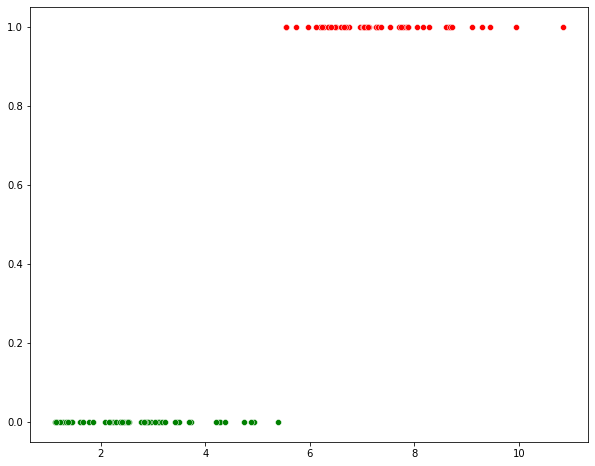

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=X0.ravel(), y=y[y==0], c='green', ax=ax)
sns.scatterplot(x=X1.ravel(), y=y[y==1], c='red', ax=ax)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
lr = MyLogisticRegression()
lr.fit(X_train, y_train, learning_rate=0.01, iterations=20000, show_cost_every_iter=1000)

Iteration 1000. Cost function=0.4277362835304639
Iteration 2000. Cost function=0.30864885436529976
Iteration 3000. Cost function=0.24721356521432486
Iteration 4000. Cost function=0.21003264523098214
Iteration 5000. Cost function=0.18503860465747657
Iteration 6000. Cost function=0.1669946762906473
Iteration 7000. Cost function=0.15328893630797938
Iteration 8000. Cost function=0.14247747621780504
Iteration 9000. Cost function=0.13369754463374386
Iteration 10000. Cost function=0.12640154468556036
Iteration 11000. Cost function=0.12022478445820835
Iteration 12000. Cost function=0.11491468992107419
Iteration 13000. Cost function=0.11029057091157098
Iteration 14000. Cost function=0.10621958702158656
Iteration 15000. Cost function=0.10260177764913389
Iteration 16000. Cost function=0.09936039964130132
Iteration 17000. Cost function=0.09643549627828493
Iteration 18000. Cost function=0.09377950100776397
Iteration 19000. Cost function=0.09135416076075595
Iteration 20000. Cost function=0.089128337

In [ ]:
y_hat_test, prob_test = lr.predict(X_test)
print("Accuracy of current implementation =", accuracy_score(y_test, y_hat_test))

Accuracy of current implementation = 1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, penalty='none').fit(X_train, y_train)
y_hat_test_clf = clf.predict(X_test)
print("Accuracy of implementation from sklearn =", accuracy_score(y_test, y_hat_test_clf))

Accuracy of implementation from sklearn = 1.0


### Testing on real data (Breast cancer wisconsin (diagnostic) dataset)  

In [ ]:
# Load data

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
breast_cancer = load_breast_cancer(as_frame=True)
data_df = breast_cancer.data
target_df = breast_cancer.target
y = np.array(target_df.tolist())

In [ ]:
# Data preprocessing: scaling

In [ ]:
# data from this row looks like a normal distribution
col_for_standard_scaler = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'texture error', 'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']
# data from this row doesn't look like a normal distribution
col_for_maxmin_scaler = ['mean concavity', 'radius error', 'perimeter error', 'area error', 'worst concavity']

In [ ]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(data_df.loc[:,col_for_standard_scaler])
mm_scaler = MinMaxScaler()
X = np.hstack((X, mm_scaler.fit_transform(data_df.loc[:,col_for_maxmin_scaler])))

In [ ]:
# Splitting data for training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Checking for imbalance in sets

In [ ]:
unique_train = np.unique(y_train, return_counts=True)
unique_test = np.unique(y_test, return_counts=True)
print("Number of samples per class in train set", unique_train)
print("Number of samples per class in test set", unique_test)

Number of samples per class in train set (array([0, 1]), array([168, 287]))
Number of samples per class in test set (array([0, 1]), array([44, 70]))


In [ ]:
# Train and Test sets are imbalance

In [ ]:
# Making sets balanced

In [ ]:
# Calculate the difference between classes in train and test sets
delta_in_train = unique_train[1][1] - unique_train[1][0]
delta_in_test = unique_test[1][1] - unique_test[1][0]

In [ ]:
# Choose randomly from zero class delta_in_train samples and add them to train test
a = np.c_[X_train, y_train]
only_zero_class = a[(a[:,-1:]==0).flatten()]
number_samples = only_zero_class.shape[0]
idx = np.random.choice(np.array(range(number_samples)), delta_in_train , replace=False)
only_zero_class_extended = np.vstack((only_zero_class[idx], only_zero_class))
print("Shape of extended zero class", only_zero_class_extended.shape)

Shape of extended zero class (287, 31)


In [ ]:
only_one_class = a[(a[:,-1:]==1).flatten()]
all_classes = np.vstack((only_zero_class_extended, only_one_class))
X_train, y_train = all_classes[:,:-1], all_classes[:,-1:]
print("Number of samples per class in train set", np.unique(y_train, return_counts=True))

Number of samples per class in train set (array([0., 1.]), array([287, 287]))


In [ ]:
# Train set now is balanced

In [ ]:
# Choose randomly from zero class delta_in_train samples and add them to train test
a = np.c_[X_test, y_test]
only_zero_class = a[(a[:,-1:]==0).flatten()]
number_samples = only_zero_class.shape[0]
idx = np.random.choice(np.array(range(number_samples)), delta_in_test , replace=False)
only_zero_class_extended = np.vstack((only_zero_class[idx], only_zero_class))
print("Shape of extended zero class", only_zero_class_extended.shape)

Shape of extended zero class (70, 31)


In [ ]:
only_one_class = a[(a[:,-1:]==1).flatten()]
all_classes = np.vstack((only_zero_class_extended, only_one_class))
X_test, y_test = all_classes[:,:-1], all_classes[:,-1:]
print("Number of samples per class in test set", np.unique(y_test, return_counts=True))

Number of samples per class in test set (array([0., 1.]), array([70, 70]))


In [ ]:
# Test set now is balanced

In [ ]:
lr = MyLogisticRegression()
lr.fit(X_train, y_train, learning_rate=0.01, iterations=20000, show_cost_every_iter=1000)

Iteration 1000. Cost function=0.10655750578460972
Iteration 2000. Cost function=0.08714433194924817
Iteration 3000. Cost function=0.07860035126695948
Iteration 4000. Cost function=0.07338299833048526
Iteration 5000. Cost function=0.06972181681554955
Iteration 6000. Cost function=0.06694933529081801
Iteration 7000. Cost function=0.06474670925186407
Iteration 8000. Cost function=0.06293788706072674
Iteration 9000. Cost function=0.061415703629699246
Iteration 10000. Cost function=0.060110226563773746
Iteration 11000. Cost function=0.058973398519301945
Iteration 12000. Cost function=0.05797085694039366
Iteration 13000. Cost function=0.0570772492008927
Iteration 14000. Cost function=0.056273390125774876
Iteration 15000. Cost function=0.05554445466711583
Iteration 16000. Cost function=0.054878783579948624
Iteration 17000. Cost function=0.05426706838043157
Iteration 18000. Cost function=0.05370177982354036
Iteration 19000. Cost function=0.05317675773913447
Iteration 20000. Cost function=0.052

In [ ]:
y_hat_test, prob_test = lr.predict(X_test)
print("Accuracy of current implementation =", accuracy_score(y_test, y_hat_test))

Accuracy of current implementation = 0.9714285714285714


In [ ]:
clf = LogisticRegression(random_state=0, penalty='none').fit(X_train, y_train.ravel())
y_hat_test_clf = clf.predict(X_test)
print("Accuracy of implementation from sklearn =", accuracy_score(y_test, y_hat_test_clf))

Accuracy of implementation from sklearn = 0.95
